 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [54]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, We read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [55]:
# Reading whale returns
whale_path = Path("./Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_df.sort_index(inplace=True)
whale_returns_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [56]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [57]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [58]:
# Reading algorithmic returns
algo_path = Path("./Resources/algo_returns.csv")
algo_return_df = pd.read_csv(algo_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_return_df.sort_index(inplace=True,)
algo_return_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [59]:
# Count nulls
algo_return_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [60]:
# Drop nulls
algo_return_df.dropna(inplace=True)
algo_return_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [61]:
# Reading S&P 500 Closing Prices
sp500_path = Path("./Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history_df.sort_index(inplace=True)

In [62]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [63]:
# Fix Data Types
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$", "")
sp500_history_df["Close"] = sp500_history_df["Close"].astype("float")
sp500_history_df.head()

c:\Users\robel\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [64]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history_df.pct_change(fill_method="ffill")
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [65]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns.isnull().sum()

Close    0
dtype: int64

In [66]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.columns = ["S&P500 Returns"]
sp500_daily_returns.head(5)

,S&P500 Returns
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [67]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
returns_df = pd.concat([whale_returns_df, algo_return_df, sp500_daily_returns], axis="columns", join="inner")
# returns_df.sort_index(inplace=True)
returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500 Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, We calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

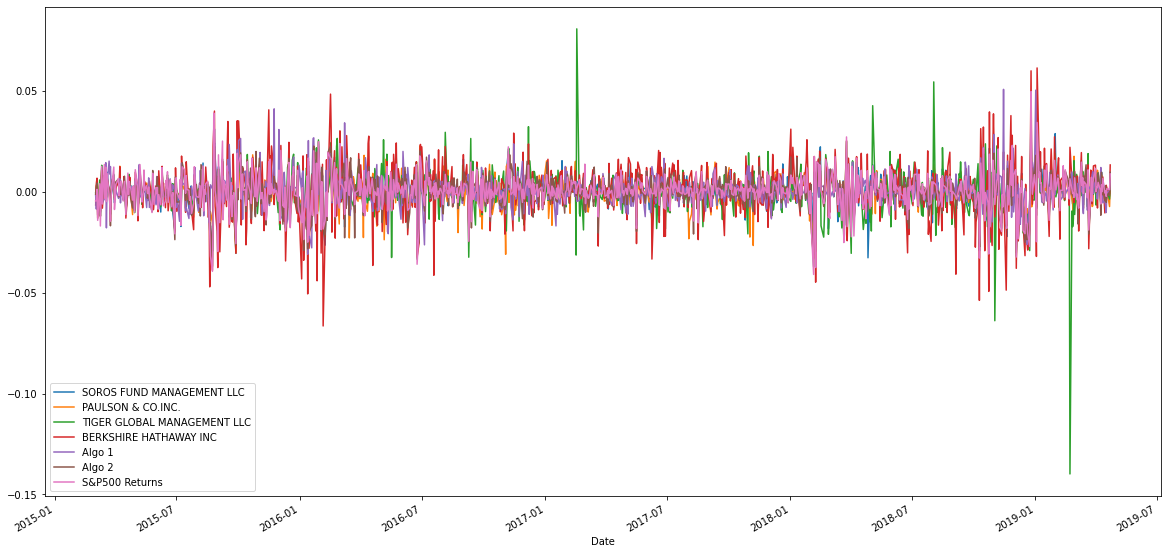

In [68]:
# Plot daily returns of all portfolios
returns_df.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

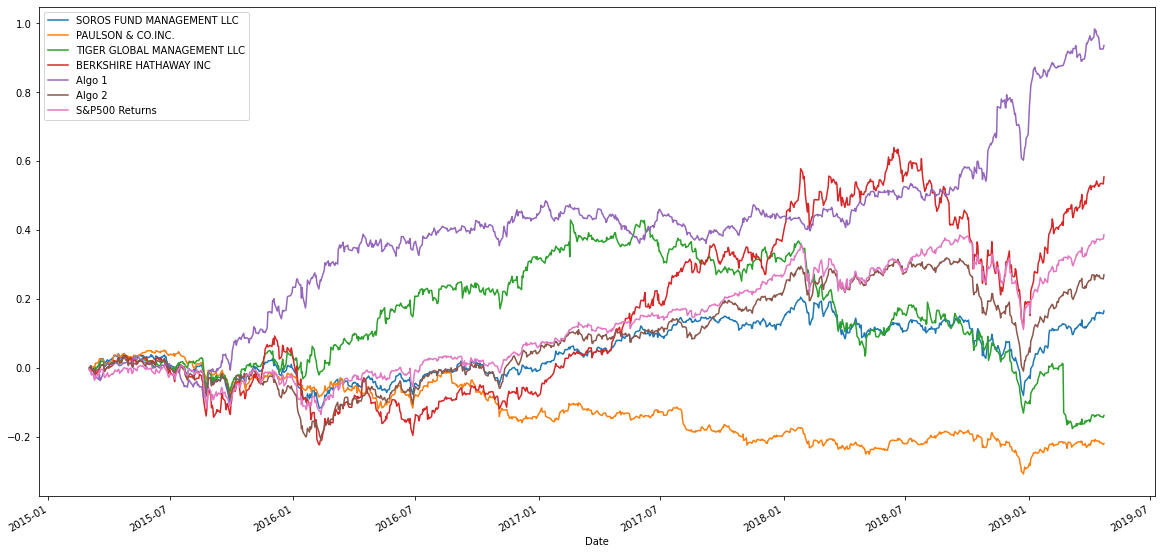

In [69]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + returns_df).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

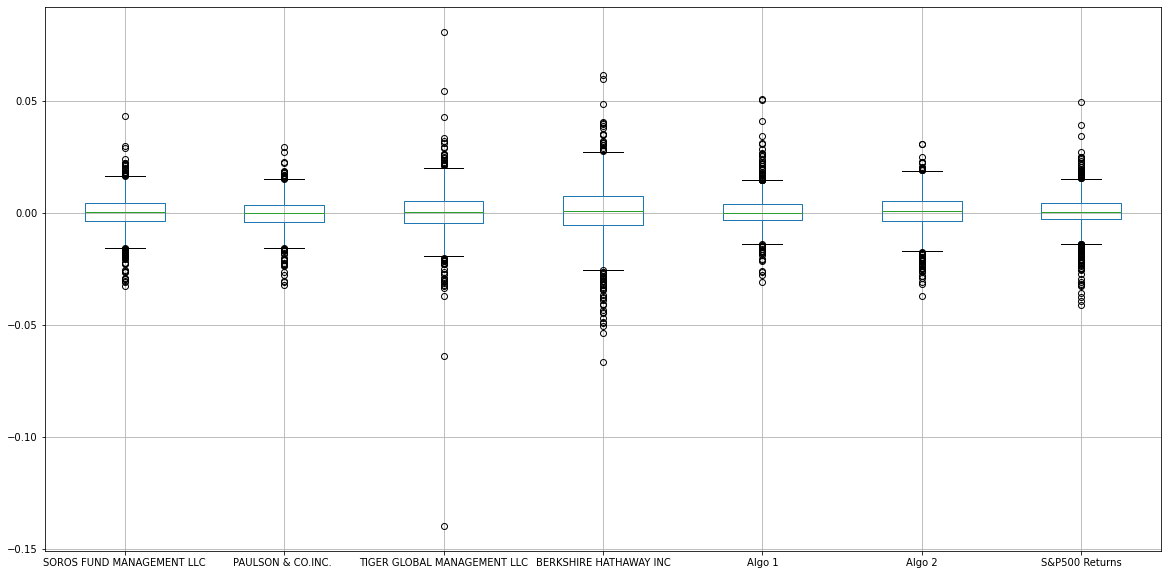

In [70]:
# Box plot to visually show risk
returns_df.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [71]:
# Calculate the daily standard deviations of all portfolios
portfolios_std = returns_df.std().sort_values()
portfolios_std



PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P500 Returns                 0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [72]:
# Calculate  the daily standard deviation of S&P 500
# Determine which portfolios are riskier than the S&P 500
print("From the result above, TIGER GLOBAL MANAGEMENT AND BERKSHIRE HATHWAY are higher risk")

From the result above, TIGER GLOBAL MANAGEMENT AND BERKSHIRE HATHWAY are higher risk


### Calculate the Annualized Standard Deviation

In [73]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = returns_df.std() * np.sqrt(252)
annualized_std.sort_values(inplace=True)
annualized_std

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P500 Returns                 0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

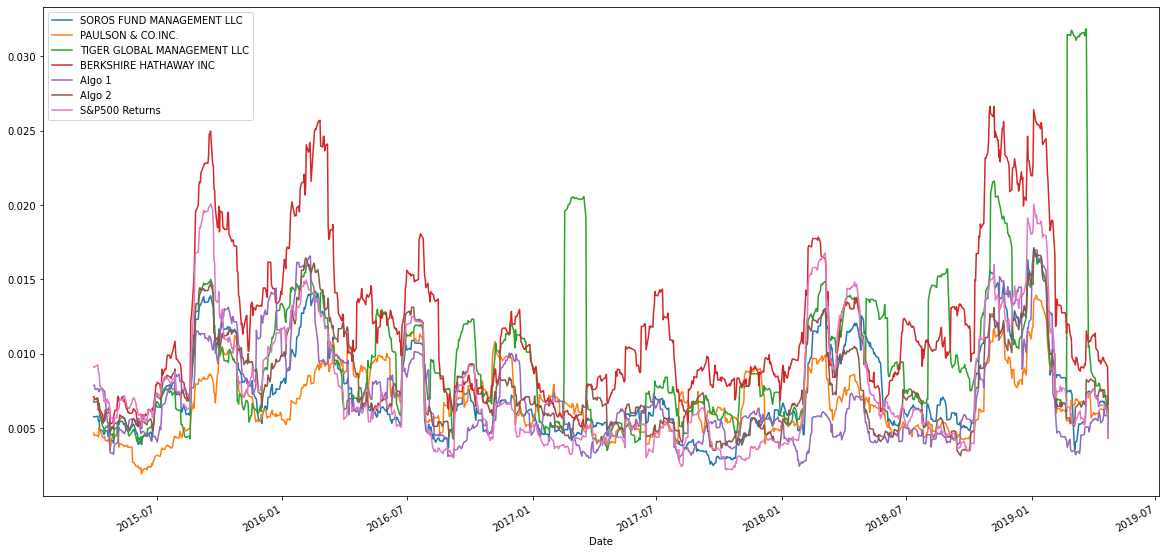

In [74]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_21day_std_df = returns_df.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_21day_std_df.plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

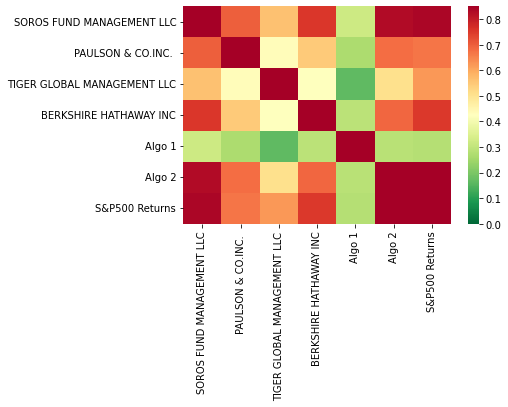

In [75]:
# Calculate the correlation
correlation = returns_df.corr()

# Display de correlation matrix
correlation
sns.heatmap(correlation, vmin=0, vmax=.85, cmap='RdYlGn_r')

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

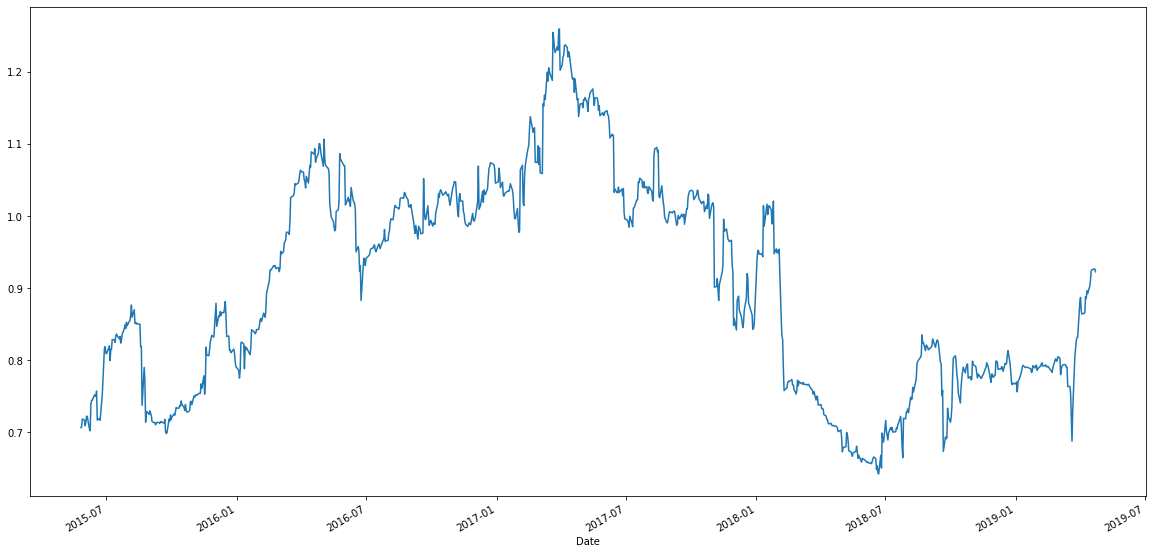

In [76]:
# Calculate covariance of a single portfolio
covariance = returns_df["Algo 2"].rolling(window=60).cov(returns_df["S&P500 Returns"])

# Calculate variance of S&P 500
variance = returns_df["S&P500 Returns"].rolling(window=60).var()
# Computing beta
algo_beta = covariance/variance
# Plot beta trend
algo_beta.plot(figsize=(20, 10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

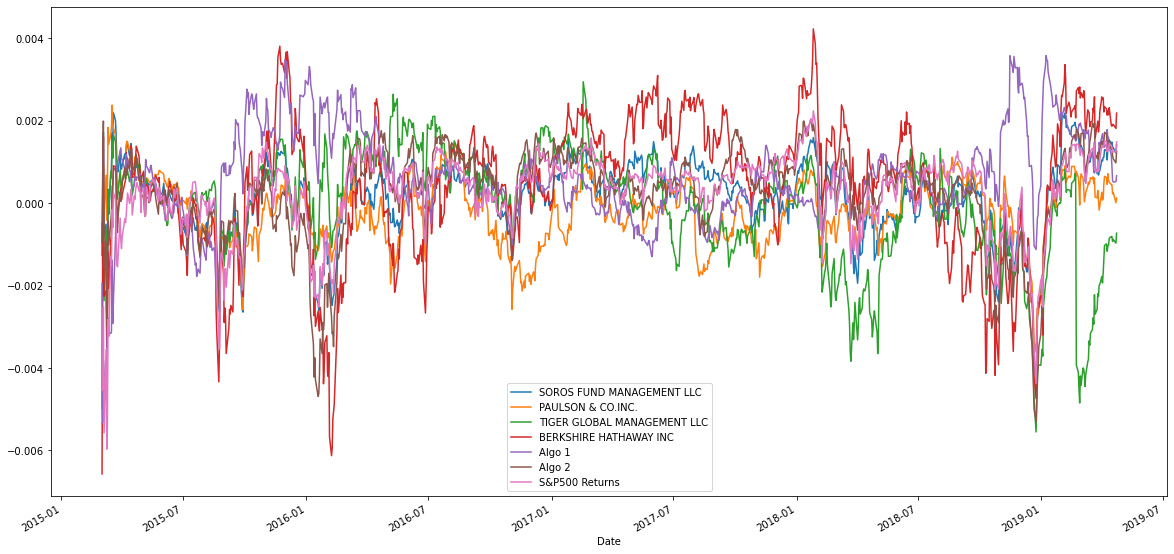

In [77]:
# Use `ewm` to calculate the rolling window
moving_returns = returns_df.ewm(halflife=21).mean()
moving_returns.plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [78]:
# Annualized Sharpe Ratios
sharpe_ratios = (returns_df.mean() * 252) / (portfolios_std * np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe Ratios'}>

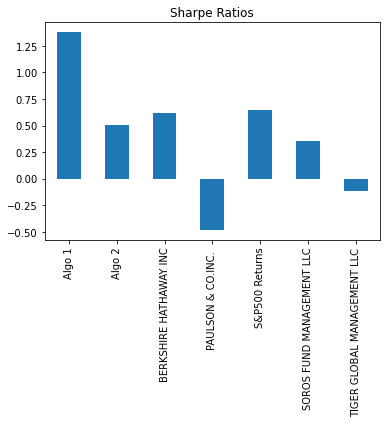

In [79]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!


In [80]:
print("The algoritmic strategy 1 outperformes both S&P 500 and whale portfolios")

The algoritmic strategy 1 outperformes both S&P 500 and whale portfolios


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
### Choose Walmart, Target and Kroger

In [81]:
# Reading data from 1st stock
wmt_path = Path("./Resources/wmt_historical.csv")
wmt_returns_df = pd.read_csv(wmt_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
wmt_returns_df.sort_index(inplace=True)
wmt_returns_df.head()

,Close
Date,
2018-05-11,83.38
2018-05-14,84.39
2018-05-15,84.52
2018-05-16,86.13
2018-05-17,84.49


In [82]:
# Reading data from 2nd stock
tgt_path = Path("./Resources/tgt_historical.csv")
tgt_returns_df = pd.read_csv(tgt_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
tgt_returns_df.sort_index(inplace=True)
tgt_returns_df.head()

,Close
Date,
2018-05-11,70.25
2018-05-14,72.90
2018-05-15,73.08
2018-05-16,75.23
2018-05-17,75.83


In [83]:
# Reading data from 2nd stock
kr_path = Path("./Resources/kr_historical.csv")
kr_returns_df = pd.read_csv(tgt_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
kr_returns_df.sort_index(inplace=True)
kr_returns_df.head()

,Close
Date,
2018-05-11,70.25
2018-05-14,72.90
2018-05-15,73.08
2018-05-16,75.23
2018-05-17,75.83


In [84]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([wmt_returns_df, tgt_returns_df, kr_returns_df], axis="columns", join="inner")
combined_df.sort_index(inplace=True)
combined_df.head()

,Close,Close,Close
Date,,,
2018-05-11,83.38,70.25,70.25
2018-05-14,84.39,72.90,72.90
2018-05-15,84.52,73.08,73.08
2018-05-16,86.13,75.23,75.23
2018-05-17,84.49,75.83,75.83


In [85]:
# Reorganize portfolio data by having a column per symbol
combined_df.columns = ["WMT", "TGT", "KR"]
combined_df.head()

,WMT,TGT,KR
Date,,,
2018-05-11,83.38,70.25,70.25
2018-05-14,84.39,72.90,72.90
2018-05-15,84.52,73.08,73.08
2018-05-16,86.13,75.23,75.23
2018-05-17,84.49,75.83,75.83


In [86]:
# Calculate daily returns
stock_returns_df = combined_df.pct_change()
# Drop NAs
stock_returns_df.dropna(inplace=True)
# Display sample data
stock_returns_df.head()

,WMT,TGT,KR
Date,,,
2018-05-14,0.012113,0.037722,0.037722
2018-05-15,0.001540,0.002469,0.002469
2018-05-16,0.019049,0.029420,0.029420
2018-05-17,-0.019041,0.007976,0.007976
2018-05-18,-0.010060,0.001451,0.001451


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [87]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolios_return_df = stock_returns_df.dot(weights)
# Display sample data
portfolios_return_df.head()

Date
2018-05-14    0.029186
2018-05-15    0.002160
2018-05-16    0.025963
2018-05-17   -0.001030
2018-05-18   -0.002386
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [88]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns_df = pd.concat([returns_df,portfolios_return_df], axis="columns", join="inner")
combined_returns_df.rename(columns= {0: "Custom"},inplace = True )

In [89]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns_df.dropna()
combined_returns_df.sort_index(inplace=True)
combined_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500 Returns,Custom
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.029186
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,0.002160
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.025963
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001030
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.002386


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [90]:
# Calculate the annualized `std`
combined_returns_df.std()
annualized_variance_custom = (combined_returns_df.var()*252)
annualized_std_custom = np.sqrt(annualized_variance_custom)
annualized_std_custom

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P500 Returns                 0.152054
Custom                         0.218894
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

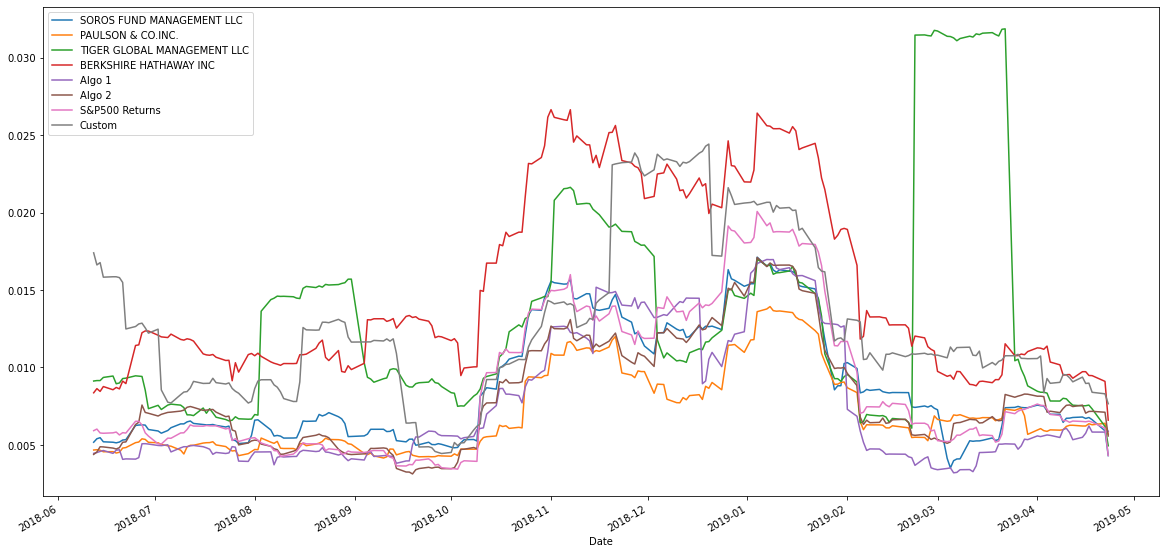

In [91]:
# Calculate rolling standard deviation
# Plot rolling standard deviation
combined_returns_df.rolling(window=21).std().plot(figsize=(20,10))


### Calculate and plot the correlation

In [92]:
# Calculate and plot the correlation
correlation_custom = combined_returns_df.corr()
correlation_custom

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500 Returns,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.473950
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.407206
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.308861
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.348696
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.080710
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.465438
S&P500 Returns,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.506035
Custom,0.473950,0.407206,0.308861,0.348696,0.080710,0.465438,0.506035,1.000000


<AxesSubplot:>

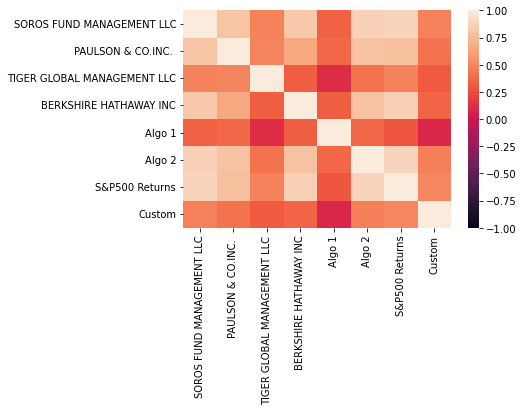

In [93]:
sns.heatmap(correlation_custom, vmin=-1, vmax=1,)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Date'>

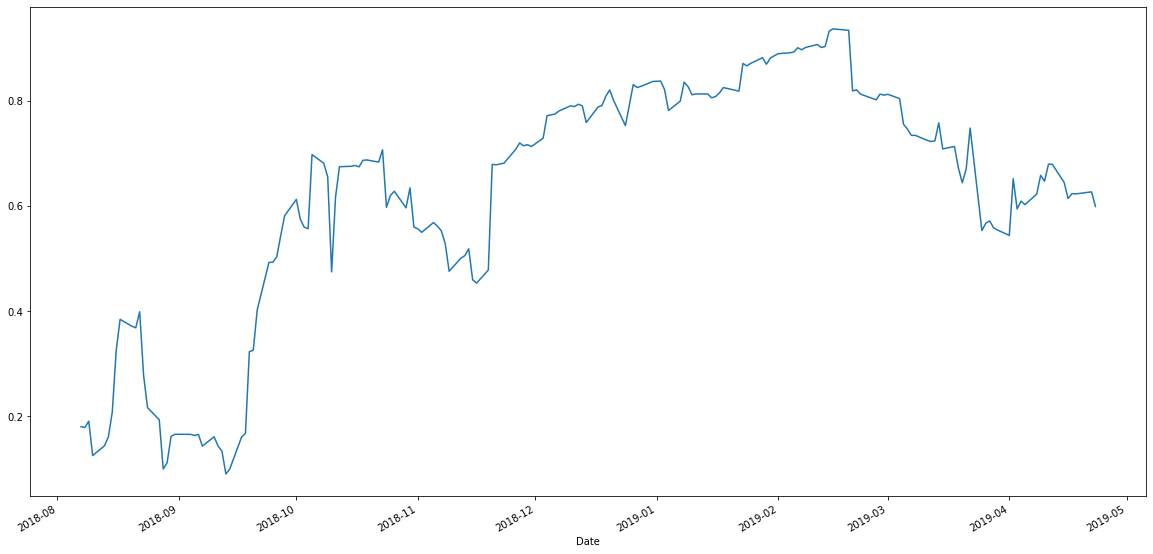

In [94]:
# Calculate and plot Beta
covariance_custom = combined_returns_df["Custom"].rolling(window=60).cov(returns_df["S&P500 Returns"])
variance_SP500 = combined_returns_df["S&P500 Returns"].rolling(window=60).var()
NEW_Beta = covariance_custom/variance_SP500
NEW_Beta.plot(figsize=(20, 10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [95]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_final = (combined_returns_df.mean() * 252) / ((combined_returns_df).std() * np.sqrt(252))
sharpe_ratios_final

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P500 Returns                 0.584820
Custom                         0.991321
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios Final'}>

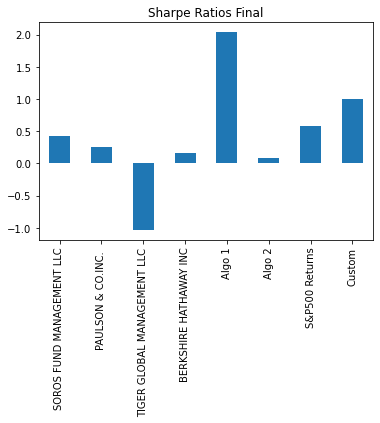

In [96]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_final.plot(kind="bar", title="Sharpe Ratios Final")

### How does your portfolio do?

Write your answer here!

In [97]:
print("The custom portfolio outperforms all except Algo 1")

The custom portfolio outperforms all except Algo 1
